In [15]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL

orders = pd.read_csv('data/oders_merged.csv')
orders.head()

,PostDate,month,FiscalYear,AssignType,channel,BuyerType,OrderNum,ProductLine,Territory,Sales,Buyer,AssignedCustomer,OR,TO,delivery_days,weighted_delivery_days,PMI
0,2017-10-31,2017-10,FY18,Assign_TO,SLC,Dealer,3004120993,R115,RNE-LNN&IME,200TM000,北京天拓四方科技有限公司,沈阳紫电科技有限公司,74629.79,74629.79,NaN,NaN,51.6
1,2017-10-31,2017-10,FY18,Assign_TO,SLC,Dealer,3004125453,R115,RNE-JL,22012004,哈尔滨宇龙自动化有限公司,长春北方化工罐装设备有限公司,23405.08,23405.08,NaN,NaN,51.6
2,2017-10-31,2017-10,FY18,Assign_TO,SLC,Dealer,3004131929,R111,RNE-HLJ,21009006,哈尔滨宇龙自动化有限公司,哈尔滨天源自动化控制技术有限责任公司,15310.63,15310.63,NaN,NaN,51.6
3,2017-10-31,2017-10,FY18,Assign_TO,SLC,Dealer,3004131929,R111,RNE-JL,22012004,哈尔滨宇龙自动化有限公司,长春北方化工罐装设备有限公司,2841.88,2841.88,NaN,NaN,51.6
4,2017-10-31,2017-10,FY18,Assign_TO,SLC,OEM,3004133247,R111,RNE-HLJ,22009005,哈尔滨宇龙自动化有限公司,哈尔滨研奥科技有限公司,4702.64,4702.64,NaN,NaN,51.6


# explore new order, turnover by month

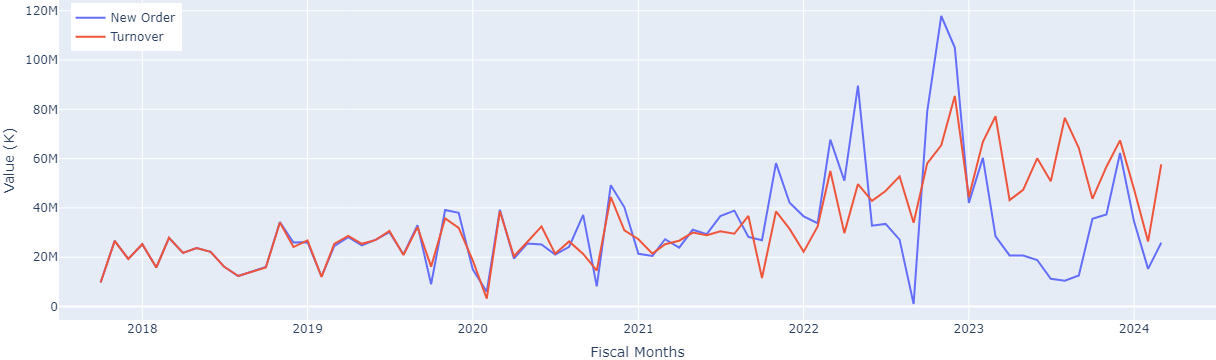

In [11]:
neworder = orders.groupby('month')['OR'].sum()
turnover = orders.groupby('month')['TO'].sum()
x = neworder.index

plot_order = go.Scatter(x=x, y=neworder, mode='lines', name='New Order')
plot_turnover = go.Scatter(x=x, y=turnover, mode='lines', name='Turnover')
fig = go.Figure([plot_order, plot_turnover])
fig.update_layout(
    height=680, margin={'t':0, 'b':0, 'l':0, 'r':0},
    xaxis=dict(title="Fiscal Months", dtick='M12', range=['2017-07-01','2024-06-30']),
    yaxis=dict(title="Value (K)"),
    legend=dict(x=0.01, y=0.99)
)
fig.show()

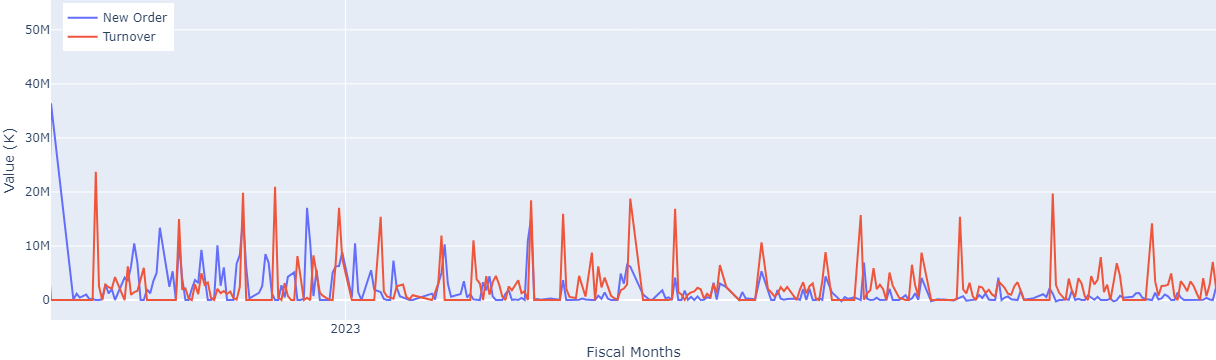

In [17]:
neworder = orders.groupby('PostDate')['OR'].sum()
turnover = orders.groupby('PostDate')['TO'].sum()
x = neworder.index

plot_order = go.Scatter(x=x, y=neworder, mode='lines', name='New Order')
plot_turnover = go.Scatter(x=x, y=turnover, mode='lines', name='Turnover')
fig = go.Figure([plot_order, plot_turnover])
fig.update_layout(
    height=680, margin={'t':0, 'b':0, 'l':0, 'r':0},
    xaxis=dict(title="Fiscal Months", dtick='M12', range=['2022-10-01','2023-09-30']),
    yaxis=dict(title="Value (K)"),
    legend=dict(x=0.01, y=0.99)
)
fig.show()

In [18]:
neworder.shape

(688,)